### Підключення бібліотек

In [34]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Підготовка датасету

Мій датасет - результат аналізу найкращих пісень за 2010-2019 роки на платформі Spotify.Кількість стовпців - 14.

Стовпці датасету представляють такі характеристики пісні:

title — назва;

artist — ім'я виконавця;

top genre - назва жанру;

year - рік випуску;

bpm - (beats per minute) темп;

nrgy - коефіцієнт енергійності (чим вище значення, тим пісня енергічніша);

dnce - коефіцієнт можливості танцювання (чим вище значення, тим легше під неї танцювати);

dB - гучність (чим вище значення, тим пісня гучніша);

live - коефіцієнт живого запису (чим вище значення, тим більша імовірність, що трек записувався із живими інструментами);

val - мотив (чим вище значення, тим веселіший мотив);

dur - тривалість (в секундах);

acous - акустичність (чим вище значення, тим менше відлуння);

spch - коефіцієнт розмовності (чим вище значення, тим більше слів різноманітних слів було використано);

pop - коефіцієнт популярності (чим вище значення, тим більша популярність).

P.S. Значення визначене як коефіцієнт має можливий діапазон значень від 0 до 100.

In [35]:
# Датасет взято із https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/AlexRedchuk/csvSharing/master/top10s.csv"

df = pd.read_csv(url, encoding='cp1252')
df.drop('Unnamed: 0', inplace=True, axis=1)

df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [36]:
sub_df = df[df.groupby('top genre')['top genre'].transform('count')>30].copy() 
sub_df['top genre'].value_counts()

dance pop       327
pop              60
canadian pop     34
Name: top genre, dtype: int64

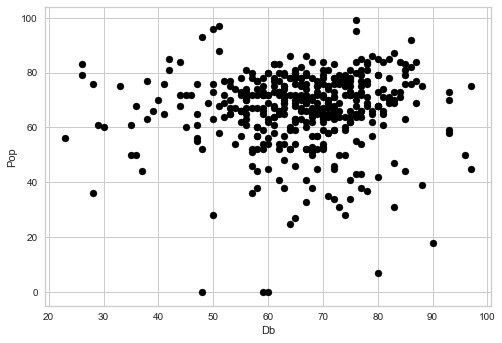

In [37]:
X = sub_df[["dnce","pop"]]
y = sub_df["top genre"]
#Visualise data points
plt.scatter(X["dnce"],X["pop"],c='black')
plt.xlabel('Db')
plt.ylabel('Pop')
plt.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

[0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0 2 1 2 2 1 1 1 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 0 2 2 0 2 1 1 2 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 1 1 1 1 2 0 2 0 2 2 0 2
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 0 2 2 0 2 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 2 0 2 2 2 1 2 0 1 1 1
 1 1 1 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2
 0 0 0 0 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 0 2 0 2 0 0 0 0 0 2 1 1 1 1 0 2 2
 0 2 0 0 0 0 0 0 0 0 0 0 2 2]


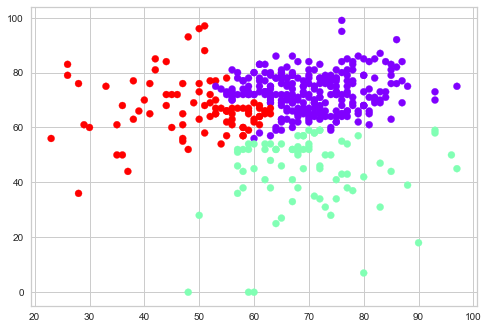

In [39]:
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=cluster.labels_, cmap='rainbow')

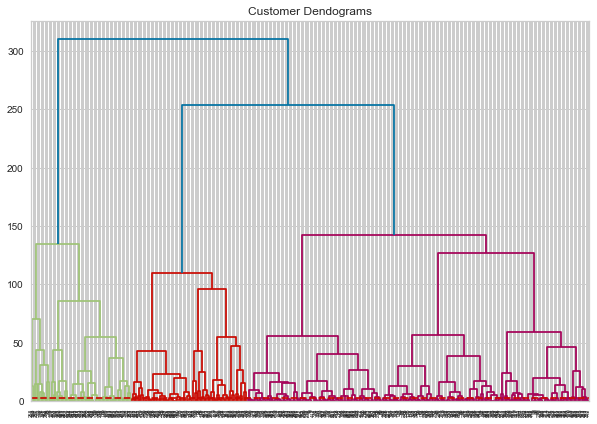

In [40]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=3, color='r', linestyle='--')

In [41]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

8.54400374531753


<Figure size 360x360 with 0 Axes>

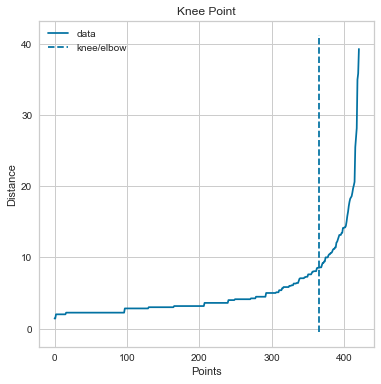

In [62]:
# parameter tuning for eps
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,10], axis=0)
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(distances[knee.knee])

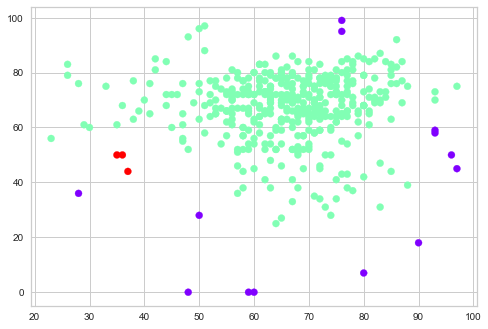

In [59]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=8.5, min_samples=3)
dbscan.fit(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=dbscan.labels_, cmap='rainbow')

In [44]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.2507
Calinski Harabasz Score: 211.3036
Davies Bouldin Score: 1.0611


In [65]:
# DBSCAN clustering
from numpy import unique
from numpy import where
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = DBSCAN(eps=8.5, min_samples=10)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.4882
Calinski Harabasz Score: 23.1310
Davies Bouldin Score: 3.1786


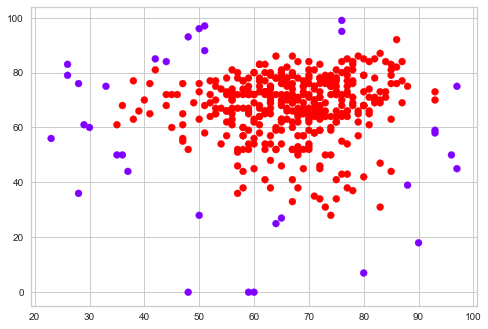

In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=8.5, min_samples=10)
dbscan.fit(X)

plt.scatter(X.iloc[:,0], X.iloc[:,1], c=dbscan.labels_, cmap='rainbow')

In [68]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids


algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(KMedoids(n_clusters=3))
algorithms.append(DBSCAN(min_samples=3))
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'K-medoids', 
                              'DBSCAN', 'Agglomerative'])

results

c:\users\sanya\appdata\local\programs\python\python39\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:231: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,-0.029856,0.019944,0.031886,0.021360,0.025583,0.364220
K-medoids,-0.013437,0.029449,0.045109,0.028316,0.034792,0.338941
DBSCAN,0.010634,0.005287,0.013423,0.065782,0.022296,-0.472357
Agglomerative,-0.058641,0.023362,0.034827,0.025223,0.029257,0.368654


### Робота із зображеннями

In [47]:
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

In [48]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

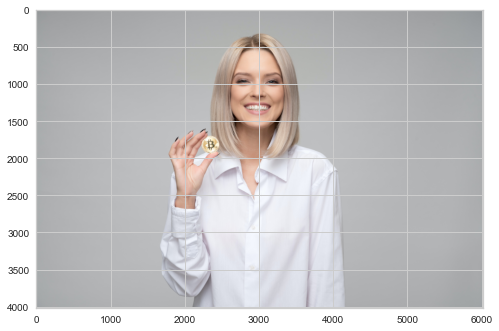

In [49]:
# import the image
from skimage import io
image = io.imread('girl.jpg') 
plt.imshow(image);

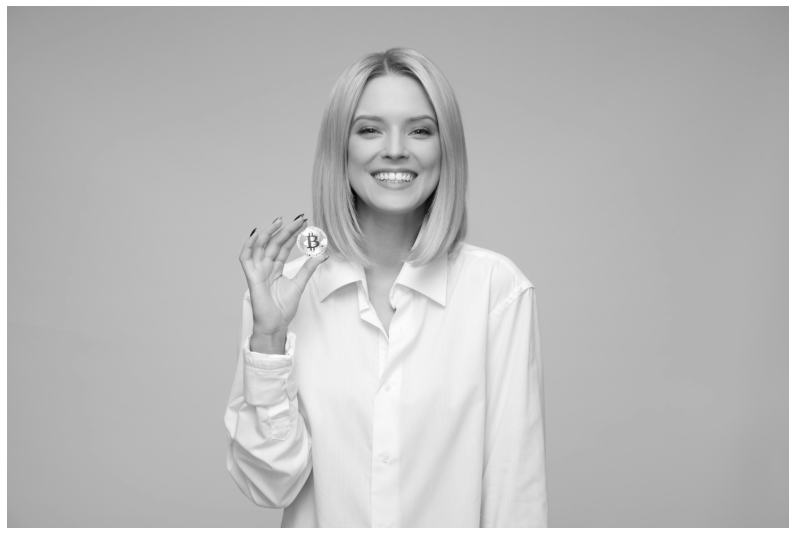

In [50]:
image_gray = color.rgb2gray(image) 
image_show(image_gray);

In [51]:
def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """   
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [80, 250], 80)[:-1]

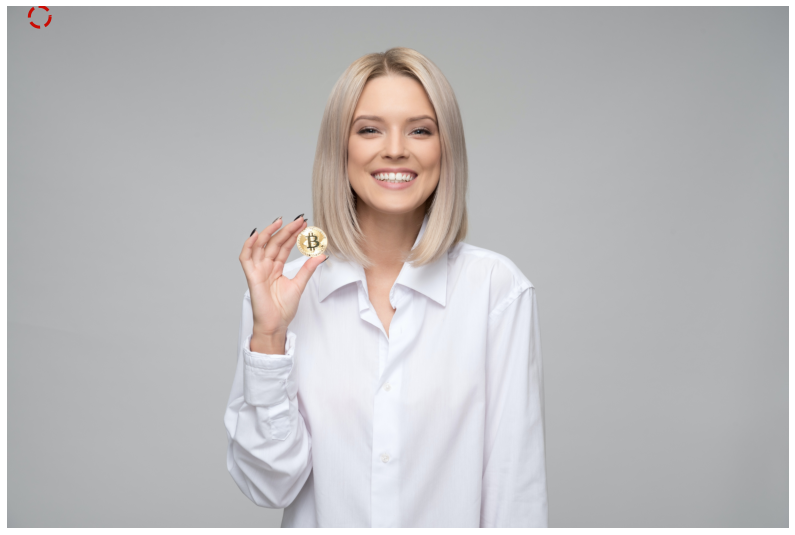

In [52]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

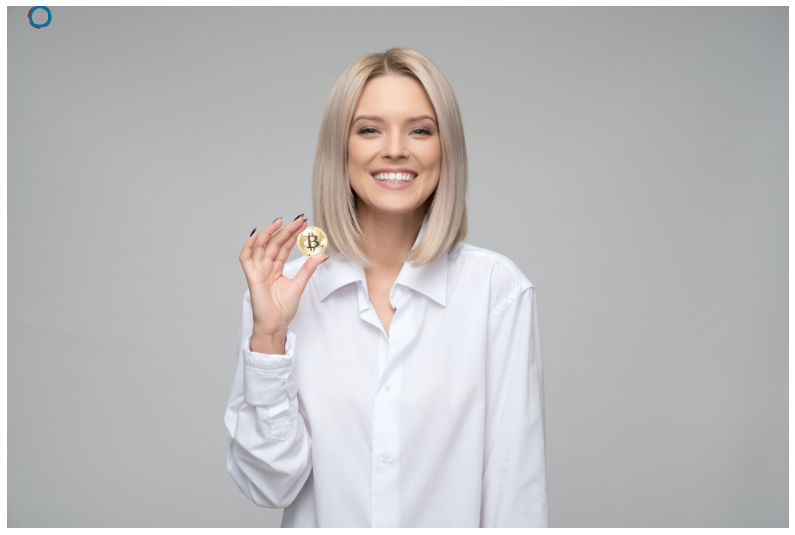

In [53]:
snake = seg.active_contour(image_gray, points)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

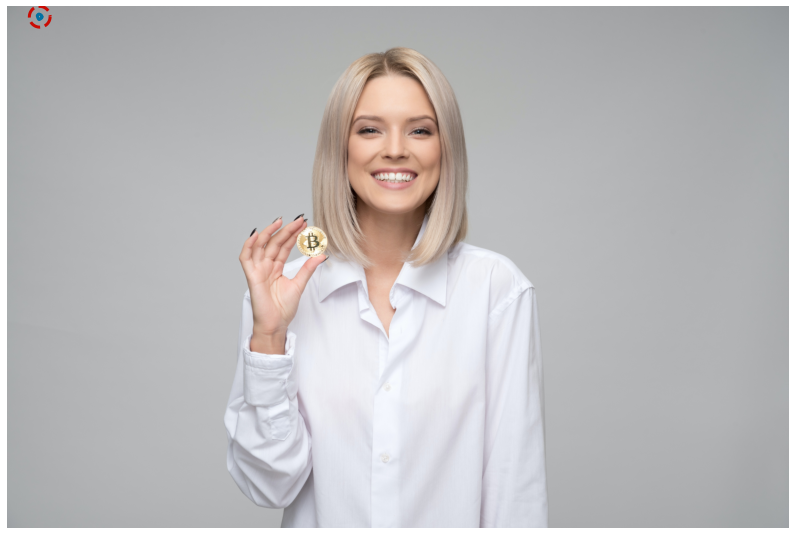

In [54]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);